In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("C:/Users/kimbj/OneDrive/바탕 화면/김범진/가천 2학년 1학기/인공지능프로그래밍/car.data")
dfs=pd.DataFrame(data=df)
dfs

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [2]:
dfs.isna().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

<AxesSubplot:xlabel='unacc', ylabel='count'>

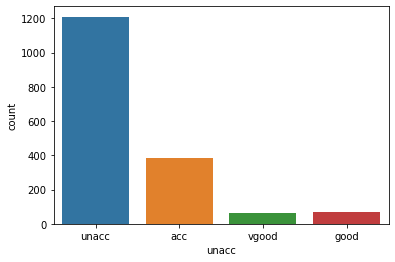

In [15]:
sns.countplot(data=dfs, x="unacc")

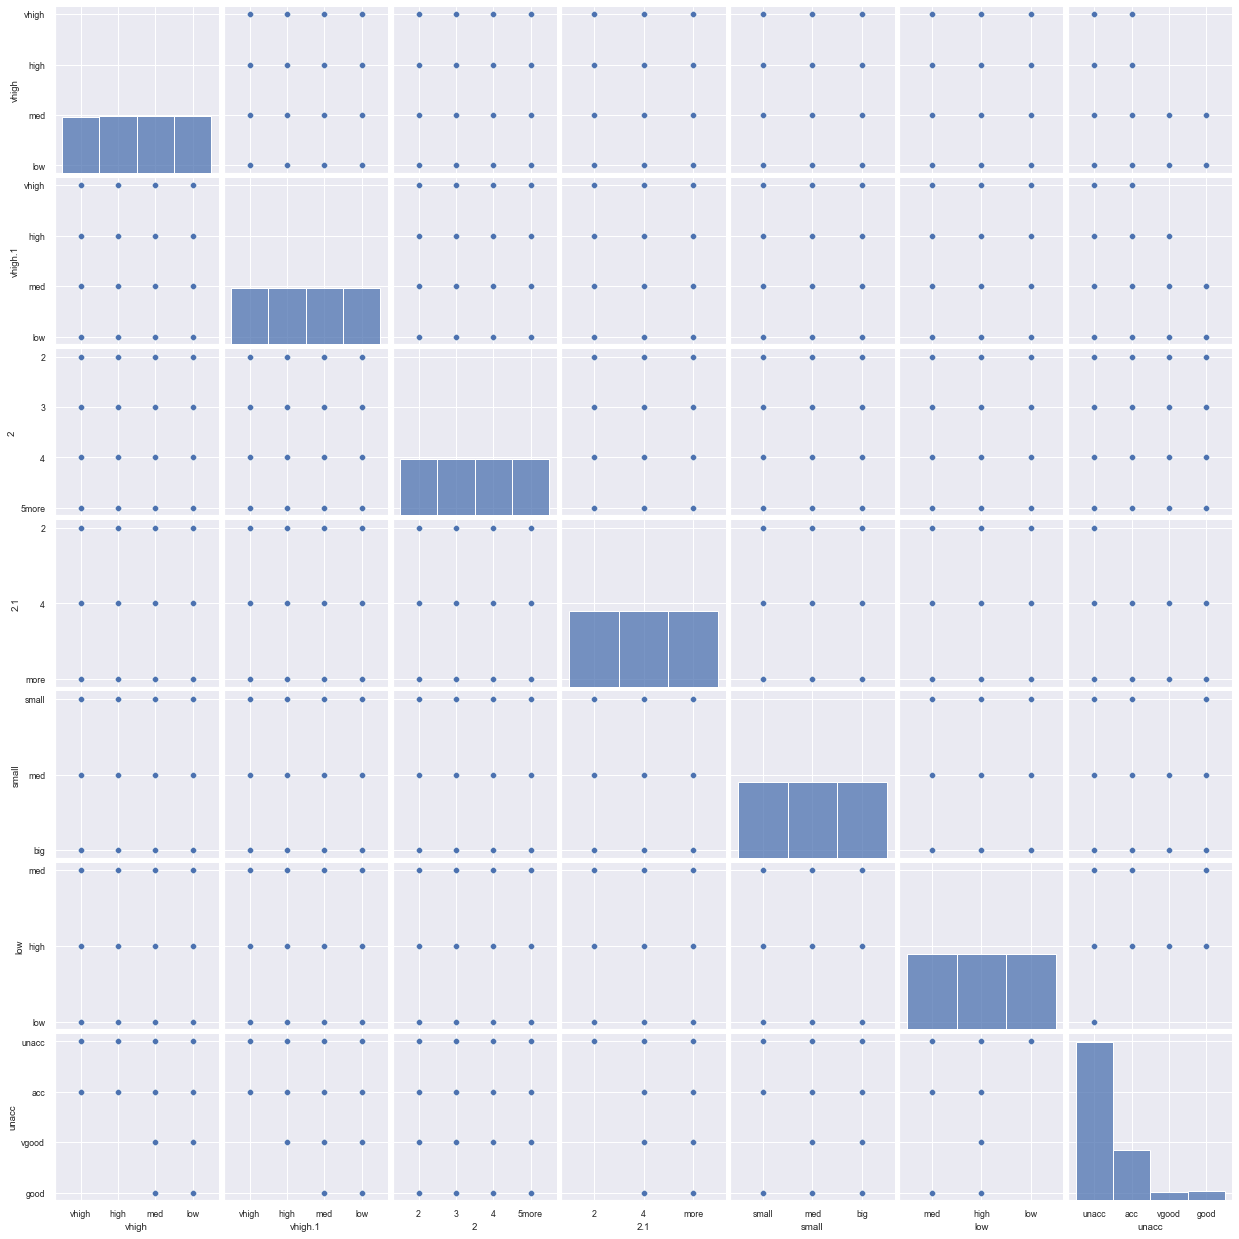

In [27]:
sns.pairplot(dfs, vars=dfs.columns)
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in dfs.columns:
    dfs[i]=le.fit_transform(dfs[i])

In [41]:
data=dfs.drop("unacc", axis=1)
target=dfs.unacc
X_train, X_test, y_train, y_test = train_test_split(data, target,test_size=0.25,random_state=42)

In [42]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.8981481481481481
[[ 84   0  20   1]
 [ 12   2   0   2]
 [  3   0 287   0]
 [  6   0   0  15]]


In [43]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.6759259259259259
[[ 19   0  83   3]
 [  2   0  14   0]
 [ 17   0 272   1]
 [ 12   0   8   1]]


In [44]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9768518518518519
[[100   2   1   2]
 [  2  13   0   1]
 [  0   0 290   0]
 [  0   2   0  19]]


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9606481481481481
[[ 97   1   6   1]
 [  2  10   0   4]
 [  1   0 289   0]
 [  2   0   0  19]]
